# ECE 228 Unet (Kaggle nucleus dataset)

# Python imports

In [1]:
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
%matplotlib inline  

import torch
from torch import nn
from torch.autograd import Variable
from torchvision import transforms, utils
from skimage import io, transform
from skimage.color import rgb2gray

from models import * 
from train import *


# Load nucleus data

/datasets/home/89/189/ltindall/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


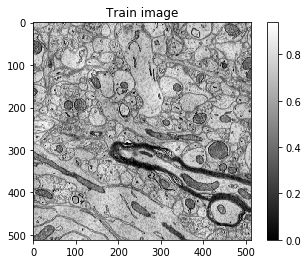

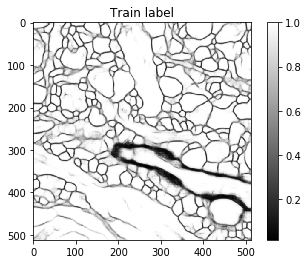

max =  1.0
train_imgs shape =  (100, 1, 512, 512)
train_labels shape =  (100, 1, 512, 512)


In [9]:
from PIL import Image

resize_size = 512

data_tif = Image.open('datasets/isbi_2013/train-input_snemi3d.tif')
train_imgs = []
i = 0
while True:
    try:
        data_tif.seek(i)
        train_imgs.append(transform.resize(np.array(data_tif),(resize_size,resize_size)))

        i += 1
    except EOFError:
        # Not enough frames in img
        break
        
train_imgs = np.array(train_imgs)
train_imgs = np.expand_dims(train_imgs, axis=1)


label_tif = Image.open('datasets/isbi_2013/train-membranes-idsia_snemi3d.tif')
train_labels = []
i = 0
while True:
    try:
        label_tif.seek(i)
        train_labels.append(transform.resize(np.array(label_tif),(resize_size, resize_size)))

        i += 1
    except EOFError:
        # Not enough frames in img
        break
        
train_labels = np.array(train_labels)
train_labels = np.expand_dims(train_labels, axis=1)


plt.imshow(np.squeeze(train_imgs[0]),cmap="gray")
plt.title("Train image")
plt.colorbar()
plt.show()

plt.imshow(np.squeeze(train_labels[0]), cmap="gray")
plt.title("Train label")
plt.colorbar()
plt.show()


print("max = ",np.max(train_labels))
#train_imgs = (train_imgs/127)-1
#train_labels = (train_labels/255)

train_labels = (train_labels > 0.95).astype(np.uint8)




print("train_imgs shape = ",train_imgs.shape)
print("train_labels shape = ",train_labels.shape)






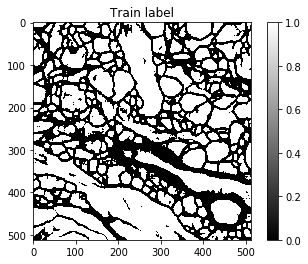

In [10]:
plt.imshow(np.squeeze(train_labels[0]), cmap="gray")
plt.title("Train label")
plt.colorbar()
plt.show()

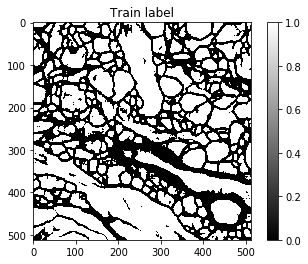

In [8]:
plt.imshow((np.squeeze(train_labels[0])>0.95).astype(np.uint8), cmap="gray")
plt.title("Train label")
plt.colorbar()
plt.show()

# Run Training

GPU is enabled 
80/20 training/validation split
total_train_size =  100
val_size =  20
epoch: 0, train loss: 0.41311508901417254


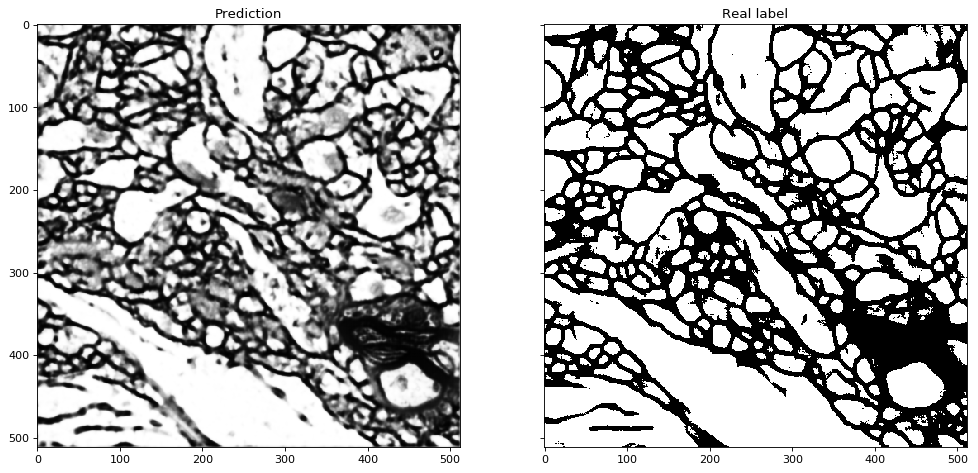

Network evaluation at epoch: 0 

train_avg_loss = 0.3000, train_avg_f1_score = 0.8194 
train_avg_precision = 0.6985, train_avg_recall = 0.9921 

val_avg_loss = 0.2996, val_avg_f1_score = 0.8186 
val_avg_precision = 0.6973, val_avg_recall = 0.9921 


epoch: 1, train loss: 0.25600798428058624


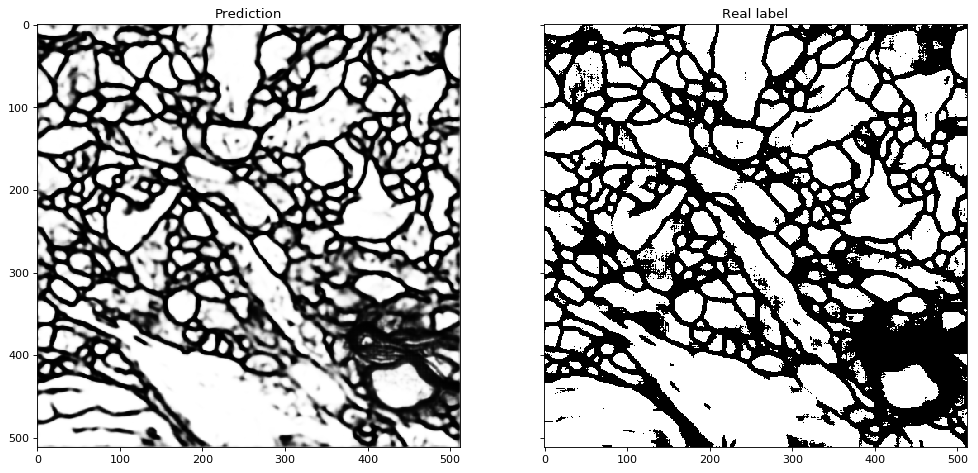

epoch: 2, train loss: 0.19263017270714045


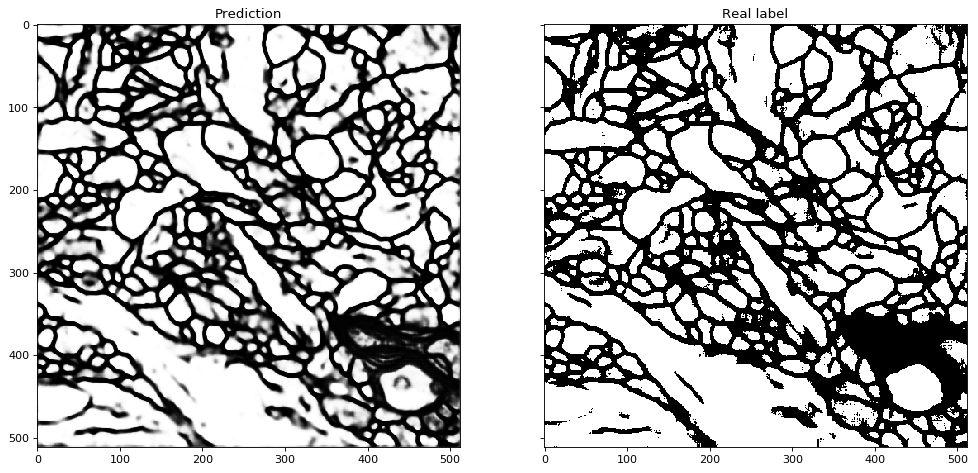

epoch: 3, train loss: 0.16272849459201097


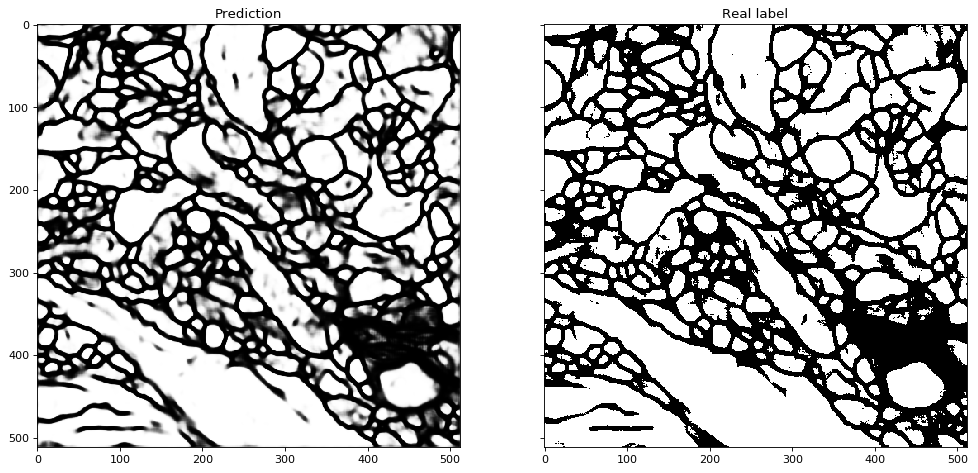

epoch: 4, train loss: 0.14723034938797355


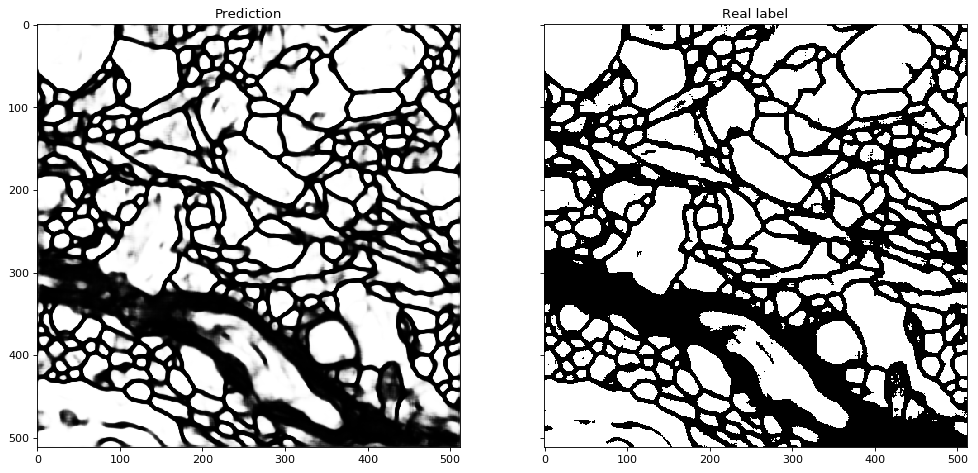

epoch: 5, train loss: 0.13707037586718798


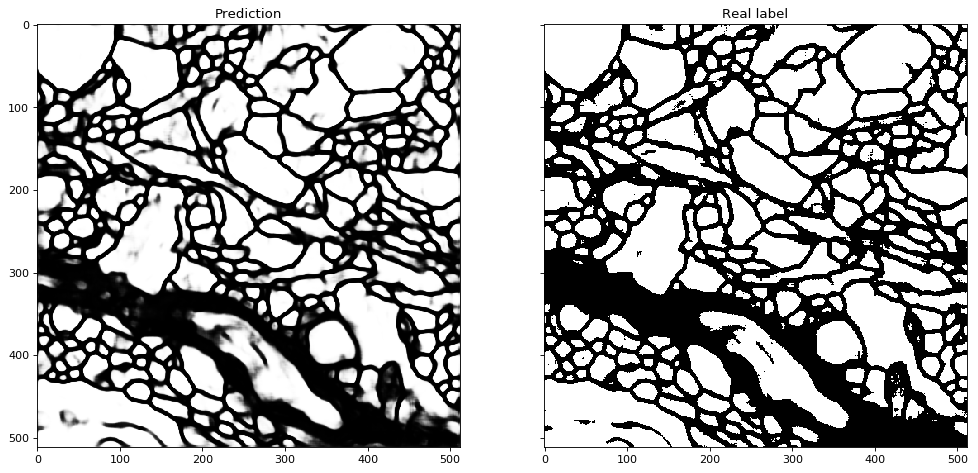

epoch: 6, train loss: 0.13010026644915343


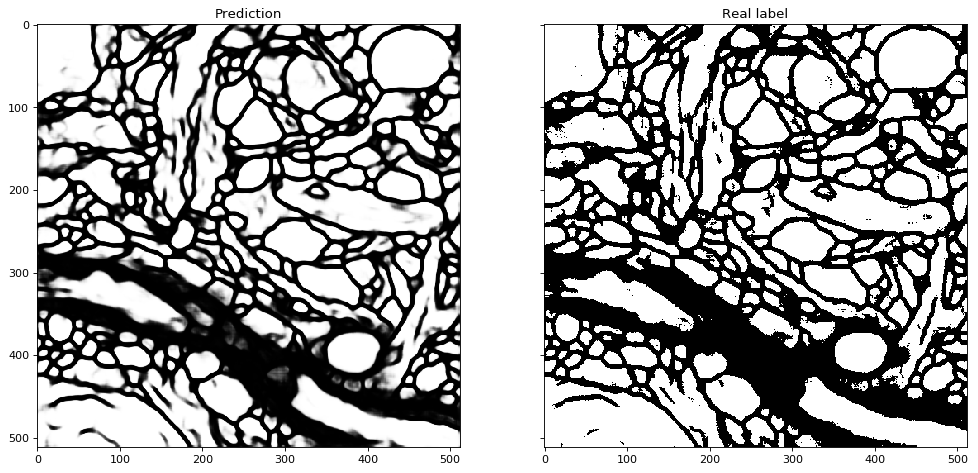

epoch: 7, train loss: 0.12489913180470466


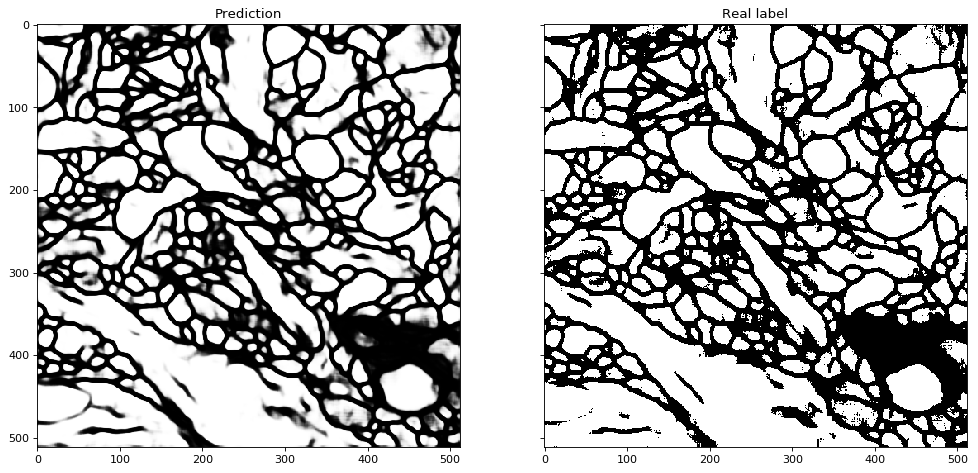

epoch: 8, train loss: 0.12072299318388105


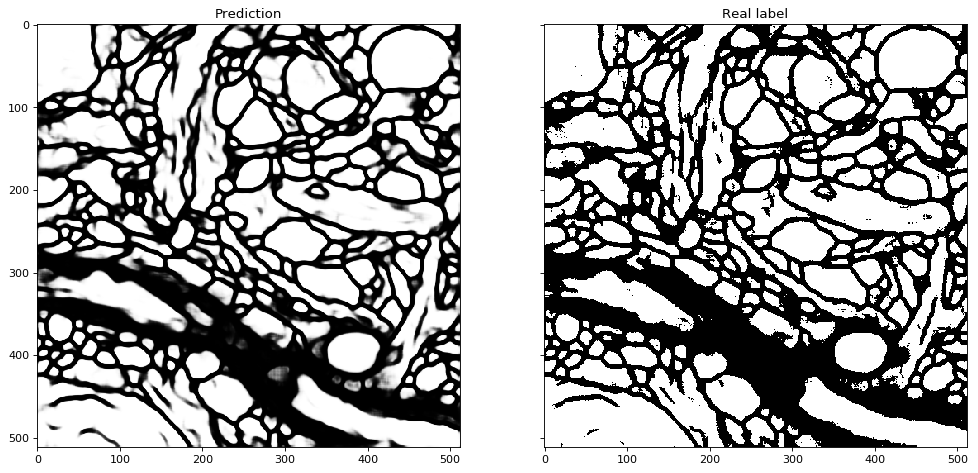

epoch: 9, train loss: 0.11699469769373536


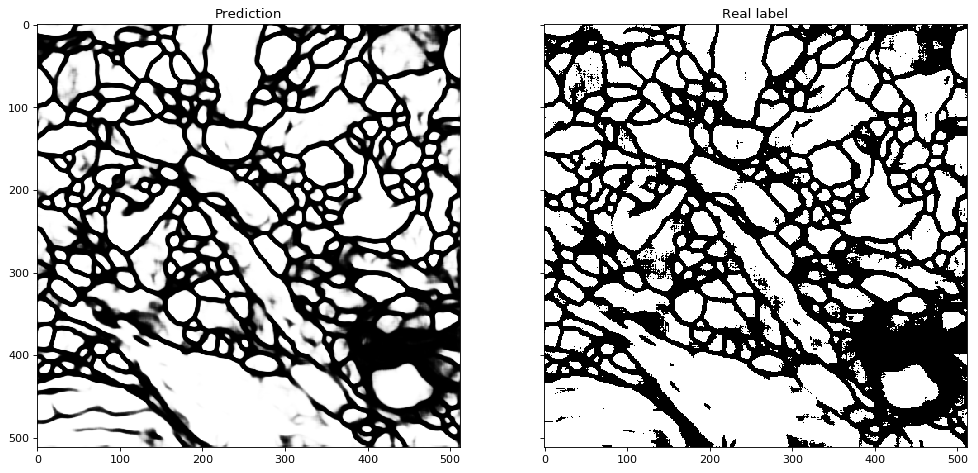

epoch: 10, train loss: 0.11307428646832704


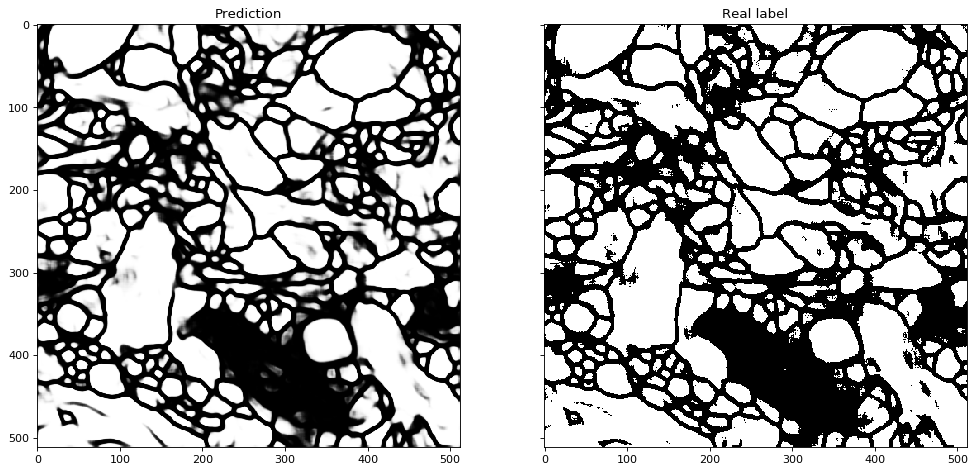

Network evaluation at epoch: 10 

train_avg_loss = 0.1083, train_avg_f1_score = 0.9478 
train_avg_precision = 0.9060, train_avg_recall = 0.9939 

val_avg_loss = 0.1145, val_avg_f1_score = 0.9465 
val_avg_precision = 0.9044, val_avg_recall = 0.9929 


epoch: 11, train loss: 0.11047741919755935


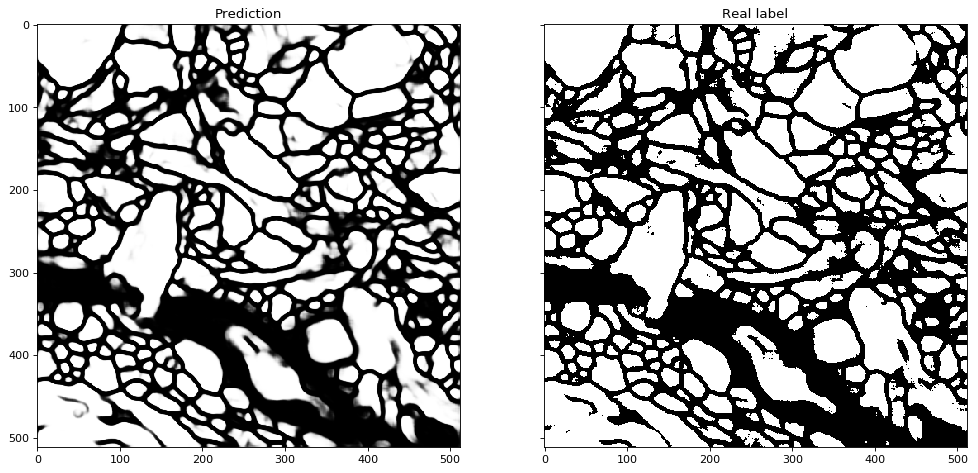

epoch: 12, train loss: 0.10799328740686179


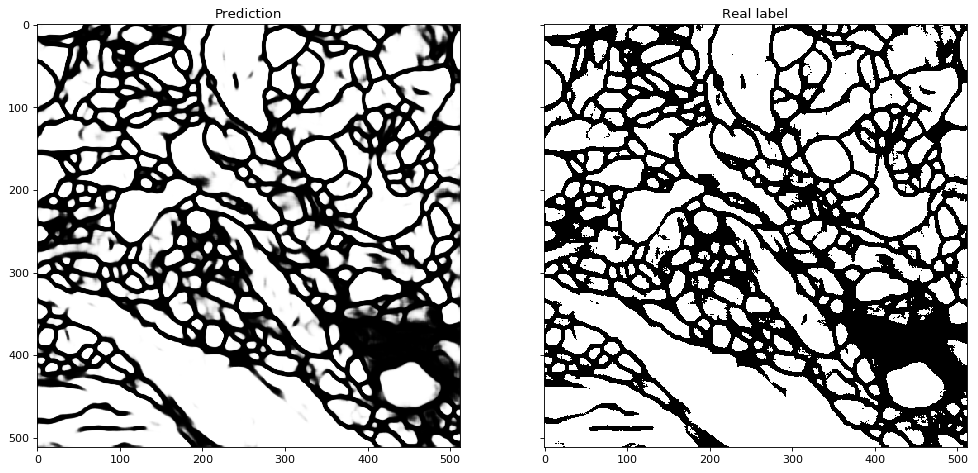

KeyboardInterrupt: 

In [11]:
# Prep GPU
GPU = torch.cuda.is_available()
print("GPU is {}enabled ".format(['not ', ''][GPU]))

batch_size = 1
n_epochs = 100


#unet(n_channels, n_classes, n_filters_start=64 )
un = unet(1,1)
if GPU: 
    un = un.cuda()

optimizer = torch.optim.Adam(un.parameters(), lr=0.01)
criterion = nn.BCELoss()




# split into training and validation set 
total_train_size = train_imgs.shape[0]
p = np.random.permutation(total_train_size)
train_imgs = train_imgs[p]
train_labels = train_labels[p]

val_size = int(0.2*total_train_size)

val_imgs = train_imgs[:val_size]
val_labels = train_labels[:val_size]

train_imgs = train_imgs[val_size:]
train_labels = train_labels[val_size:]

print("80/20 training/validation split")
print("total_train_size = ",total_train_size)
print("val_size = ", val_size)



# run training 
training(GPU, un,train_imgs, train_labels, val_imgs, val_labels, optimizer, criterion, n_epochs, batch_size)


In [ ]:
whos


# todo 

0. model.train() vs model.eval()
1. tune prediction threshold parameter 
2. disconnecting objects 
3. more datasets 
4. inception modules 